In [1]:
# Bibliotecas para esse projeto

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy

from statsmodels.graphics.mosaicplot import mosaic

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.image as mpimg

import seaborn as sns

from sklearn import datasets

%matplotlib inline

In [ ]:
#Os datasets
# Para essa primeira parte ilustraremos códigos de gráficos de barra, linha, dispersão, além de histogramas e boxplots 
#  utilizando os pacotes mais famosos Matplotlib, Seaborn, Plotly e Bokeh. 
#  Os datasets escolhidos para esse trabalho serão o Titanic (df) e Iris (iris).

In [13]:
df = pd.read_csv('C:/Users/rafae/OneDrive/Área de Trabalho/Eletiva de Dados/Atividades/Aula10/train_titanic.csv')
df = df[['Sex','Age','Fare','Embarked','Survived']]
df.Age.fillna(df.Age.mean(),inplace=True)
df.Embarked.fillna('S',inplace=True)
df['Survived'] = df['Survived'].map({0:'Died',1:'Survived'})

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris = pd.DataFrame(X, columns=iris.feature_names)
iris['Species'] = y

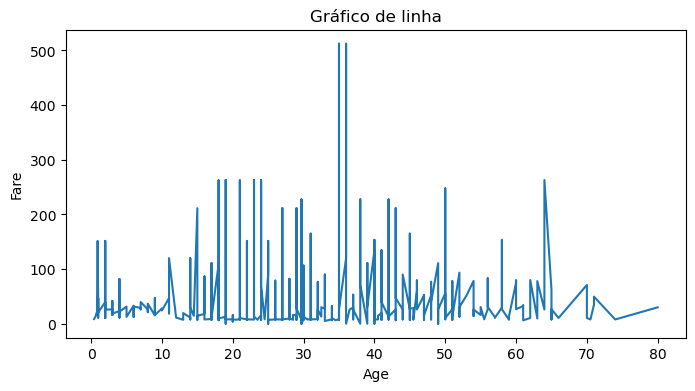

In [17]:
#Gráfico de linha
# Gráfico de linha no matplotlib

result = df.sort_values(by=['Age'])

plt.figure(figsize=(8,4))

plt.plot(result['Age'],result['Fare'])

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Gráfico de linha")

plt.show()

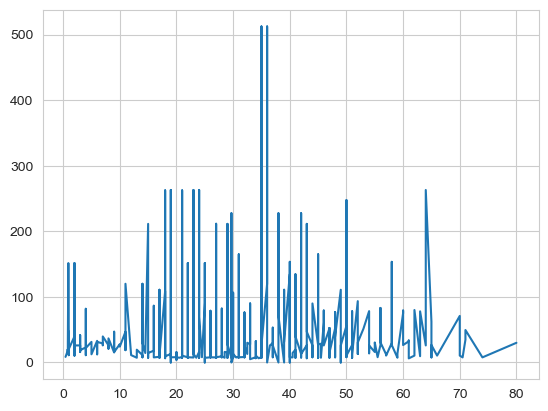

In [19]:
#Gráfico de linha no seaborn
# gráfico da função de cumulação
plt.rcdefaults()

sns.set_style("whitegrid")

plt.plot(result['Age'],result['Fare'])
plt.show()

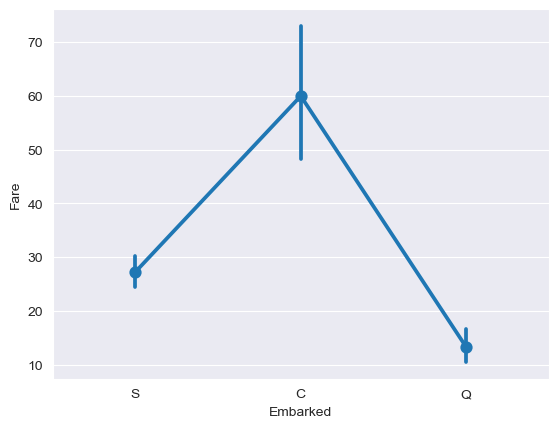

In [21]:
# O gráfico de ponto para visualização de padrões em dados categóricos.

plt.rcdefaults()

sns.set_style("darkgrid")

ax = sns.pointplot(x="Embarked", y="Fare", data=df)

plt.show()

In [23]:
#Gráfico de barras
# Exemplos de gráficos de barra no matplotlib
# Bom para visualizações de dados categóricos. No nosso dataset temos dois tipos de dados 
# categóricos: Sex (sexo) e Embarked (Portão de embarque).

df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

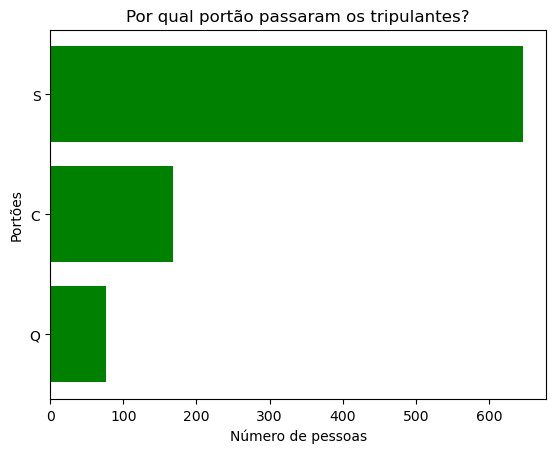

In [25]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
embarked = ('S', 'C', 'Q')
y_pos = np.arange(len(embarked))
performance = [646,168,77]

ax.barh(y_pos, performance, align='center',color='green')

ax.set_yticks(y_pos)
ax.set_yticklabels(embarked)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Número de pessoas')
ax.set_ylabel('Portões')
ax.set_title('Por qual portão passaram os tripulantes?')

plt.show()

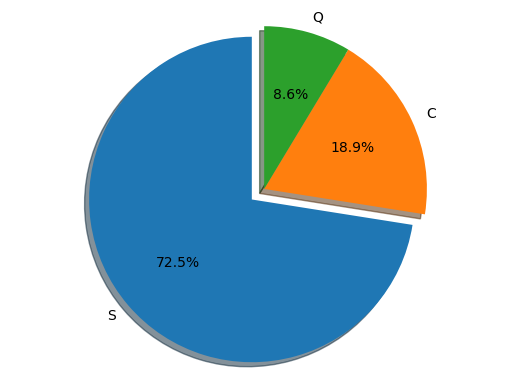

In [27]:
# Gráfico de barras é o gráfico de pizza.

labels = ('S', 'C', 'Q')
sizes = [646,168,77]
explode = (0.1, 0, 0)  # only "explode" the 1nd slice (i.e. 'S')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

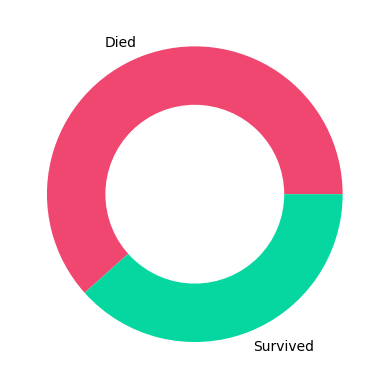

In [29]:
# Não se recomenda gráficos de pizza devido a dificuldade do ser humano de enxergar ângulos. 
# Uma opção ao pizza, é o Donut.

# create data
size = df["Survived"].value_counts().values
labels = df["Survived"].value_counts().index
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='white')

# Give color names
plt.pie(size, labels=labels, colors=['#EF476F','#06D6A0'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

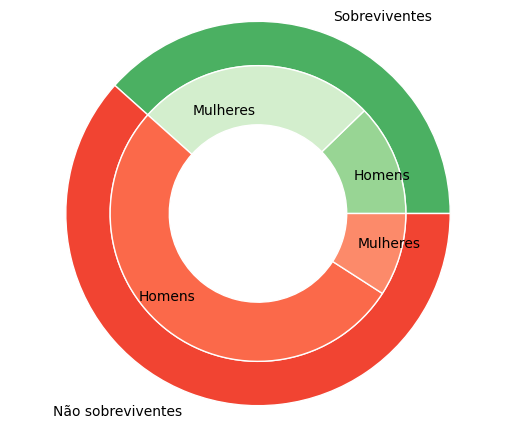

In [31]:
# Um exemplo de donut em análise bivariada.

group_names=['Sobreviventes', 'Não sobreviventes']
group_size=[342,549]
subgroup_names=['Homens', 'Mulheres', 'Homens', 'Mulheres']
subgroup_size=[109,233,468,81]
 
# Create colors
a, b=[plt.cm.Greens, plt.cm.Reds] # https://matplotlib.org/stable/tutorials/colors/colormaps.html
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.4), a(0.2), b(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

In [ ]:
# Um gráfico de barra horizontal.

In [33]:
df[df['Sex']=='male']['Embarked'].value_counts()

Embarked
S    441
C     95
Q     41
Name: count, dtype: int64

In [35]:
df[df['Sex']=='female']['Embarked'].value_counts()

Embarked
S    205
C     73
Q     36
Name: count, dtype: int64

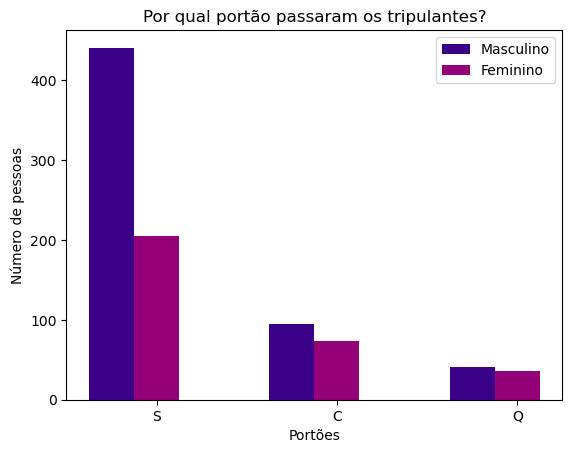

In [37]:
plt.rcdefaults()
fig, ax = plt.subplots()

x = np.arange(3)
males = [441,95,41]
females = [205,73,36]
width = 0.25

ax.bar(x, males, width, color='#3a0088', label="Masculino")
ax.bar(x + width, females, width, color='#930077', label="Feminino")

ax.set_xticks(x + width)
ax.set_xticklabels(['S', 'C', 'Q'])
ax.set_xlabel("Portões")
ax.set_ylabel("Número de pessoas")
ax.set_title("Por qual portão passaram os tripulantes?")
ax.legend(loc = 'upper right')

plt.show()

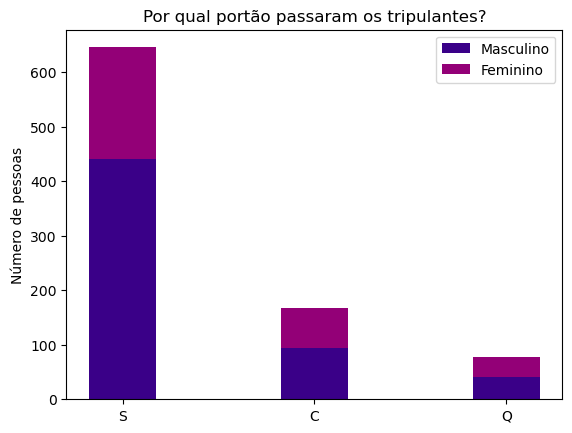

In [39]:
plt.rcdefaults()

N = 3
males = [441,95,41]
females = [205,73,36]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, males, width, color='#3a0088')
p2 = plt.bar(ind, females, width, color='#930077', bottom=males)

plt.ylabel('Número de pessoas')
plt.title('Por qual portão passaram os tripulantes?')
plt.xticks(ind, ('S', 'C', 'Q'))
plt.yticks(np.arange(0, 700, 100))
plt.legend((p1[0], p2[0]), ('Masculino', 'Feminino'))

plt.show()

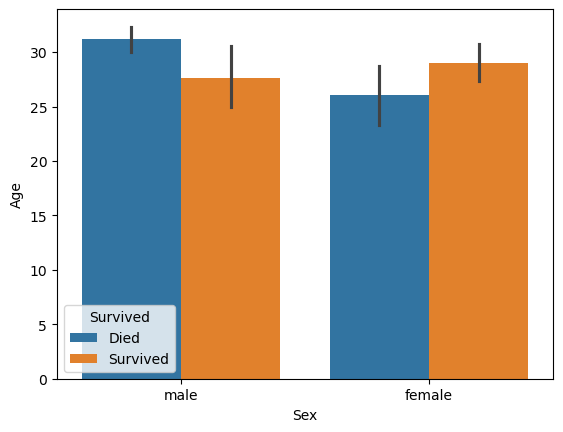

In [41]:
# gráficos de barra no Seaborn
# Observe que no próximo gráfico podemos visualizar 4 características do conjunto de dados simultaneamente, 
# sendo 3 categóricas e uma inteira.

plt.rcdefaults()

g = sns.barplot(
    x="Sex", 
    y="Age", 
    hue="Survived", 
    data=df)
plt.show()

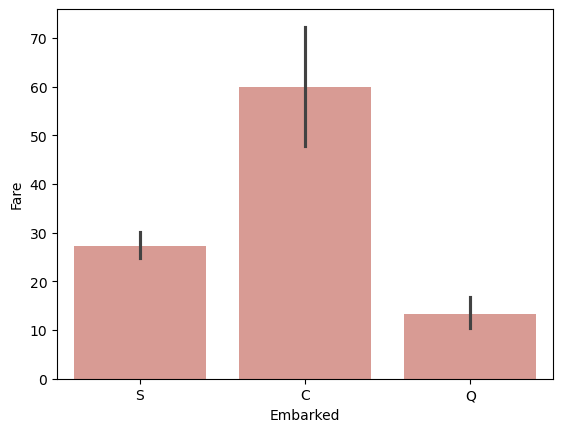

In [43]:
plt.rcdefaults()

ax = sns.barplot(y="Fare", data=df, color="salmon", x="Embarked", saturation=.5)
plt.show()

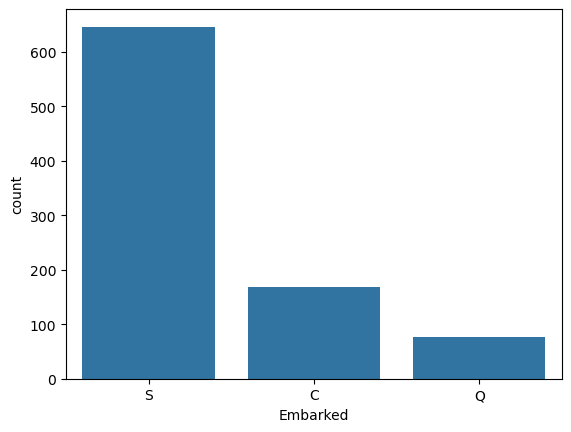

In [45]:
plt.rcdefaults()

ax = sns.countplot(
    x="Embarked",
    data=df[['Embarked']],
    order = df['Embarked'].value_counts().index)

plt.show()

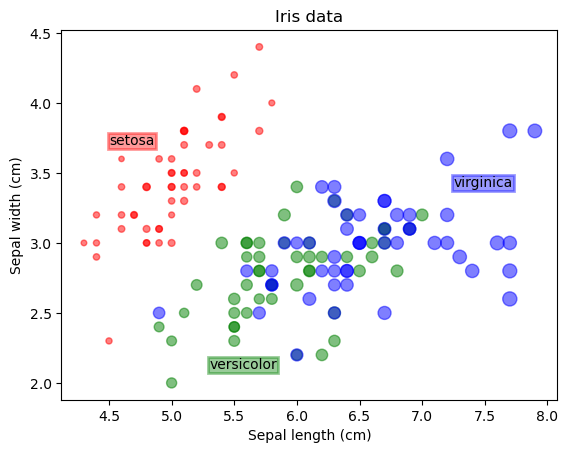

In [47]:
# Gráficos de dispersão
# ráfico de dispersão com o matplotblib

plt.rcdefaults()

colors = 50*['red']+50*['green']+50*['blue']
area = iris['petal length (cm)']*15

xdata = iris['sepal length (cm)']
ydata = iris['sepal width (cm)']

plt.scatter(x=xdata, y=ydata, s=area, c=colors, alpha=0.5)
plt.title('Iris data')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

# anotações: https://matplotlib.org/users/annotations.html#annotating-with-text-with-box
bbox_props_setosa = dict(boxstyle="square,pad=0.1", fc="red", ec="r", lw=2, alpha=0.4)
plt.annotate('setosa',xy=(4.5,3.7),size=10,bbox=bbox_props_setosa)
bbox_props_virginica = dict(boxstyle="square,pad=0.1", fc="blue", ec="b", lw=2, alpha=0.4)
plt.annotate('virginica',xy=(7.25,3.4),size=10, bbox=bbox_props_virginica)
bbox_props_versicolor = dict(boxstyle="square,pad=0.1", fc="green", ec="g", lw=2, alpha=0.4)
plt.annotate('versicolor',xy=(5.3,2.1),size=10, bbox=bbox_props_versicolor)

plt.show()

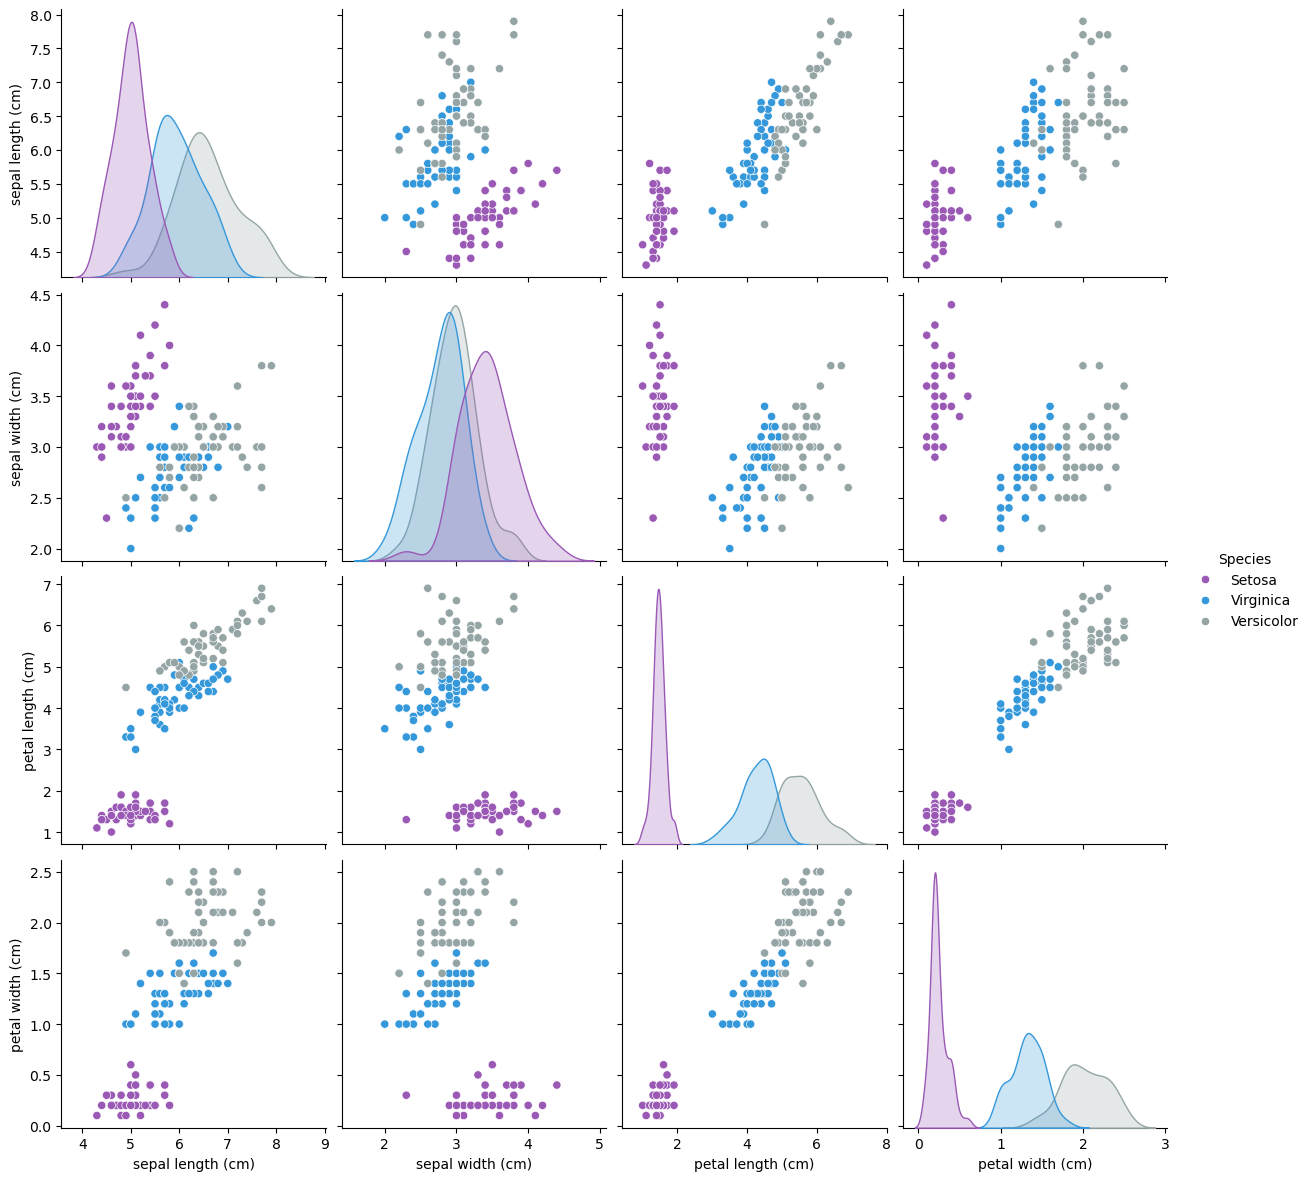

In [49]:
# Gráfico de dispersão com o Seaborn
plt.rcdefaults()

iris['Species'] = 50*['Setosa'] + 50*['Virginica'] + 50*['Versicolor']

# Escolhendo as cores
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# criando gráfico para visualização de relações de 2 a 2 features
sns.pairplot(iris,
             hue='Species',
             palette=flatui,
             vars = [
                 'sepal length (cm)',
                 'sepal width (cm)',
                 'petal length (cm)',
                 'petal width (cm)'
             ],
             size=3,
             diag_kind="kde") # can be hist

plt.show()

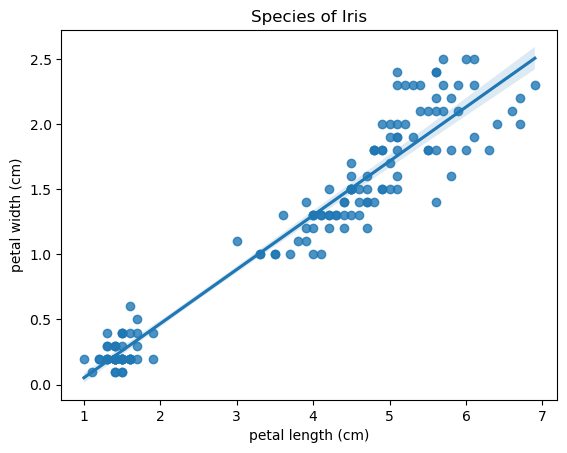

In [51]:
# fazer gráficos já com regressão linear:

ax = sns.regplot(x="petal length (cm)", y="petal width (cm)", data=iris)
ax.set_title("Species of Iris")
plt.show()

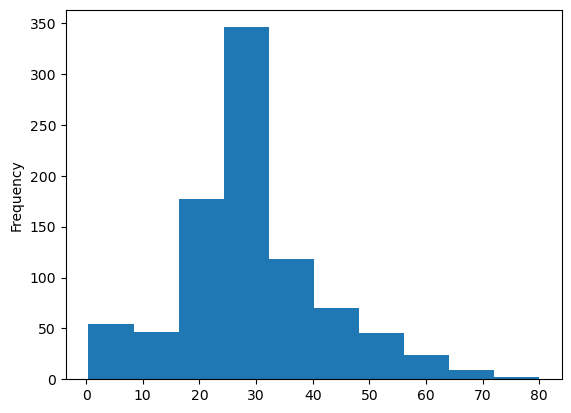

In [53]:
# Histogramas
#  Histogramas no matplotlib
plt.rcdefaults()

# a simple way
df['Age'].plot(kind='hist')
plt.show()

In [55]:
mu, sigma = np.mean(df['Age']), np.std(df['Age'])
print(mu, sigma)

29.69911764705882 12.994716872789033


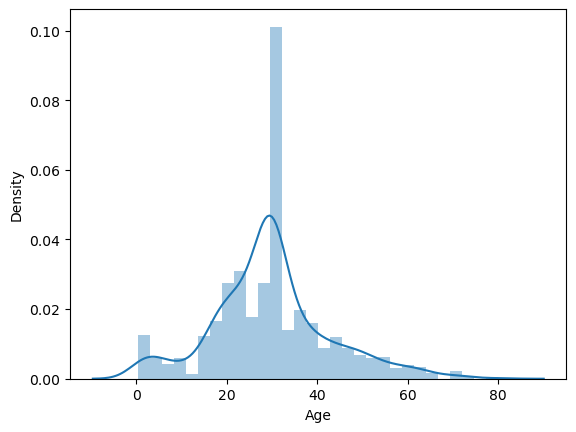

In [57]:
# Histogramas no Seaborn
#   Fonte: https://seaborn.pydata.org/tutorial/distributions.html

plt.rcdefaults()

sns.distplot(df['Age'])
plt.show()

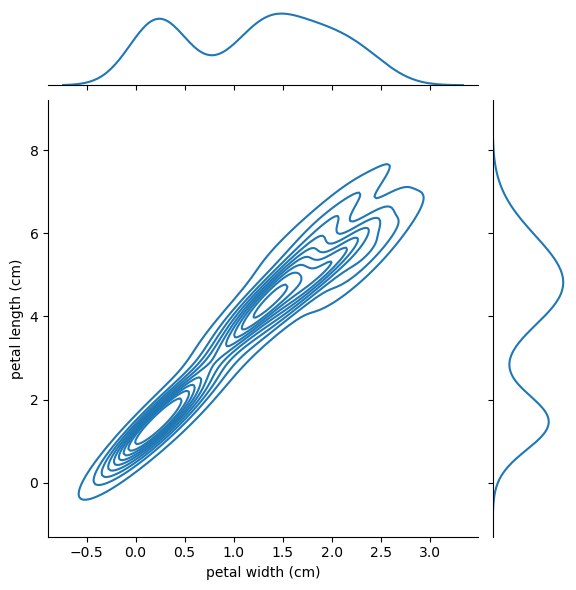

In [59]:
sns.jointplot(x="petal width (cm)", y="petal length (cm)", data=iris, kind="kde")
plt.show()

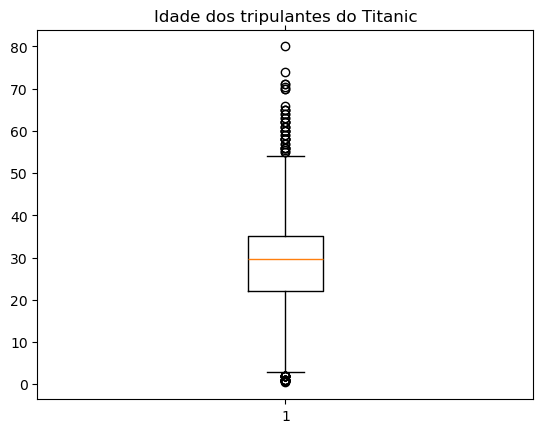

In [61]:
# Boxplot no matplotlib
plt.rcdefaults()

plt.boxplot(df['Age'])
plt.title("Idade dos tripulantes do Titanic")

# remove xticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.show()

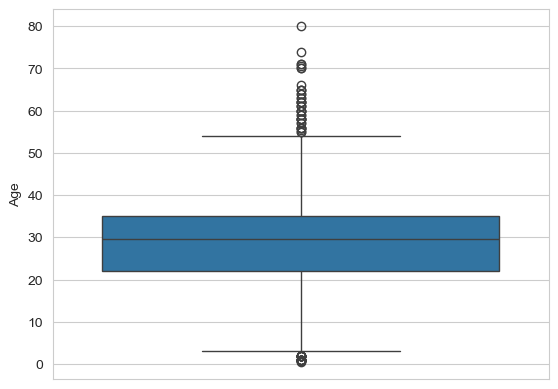

In [63]:
# Boxplot no Seaborn
# Fonte: https://seaborn.pydata.org/generated/seaborn.boxplot.html

plt.rcdefaults()

sns.set_style("whitegrid")

ax = sns.boxplot(y=df["Age"])
plt.show()

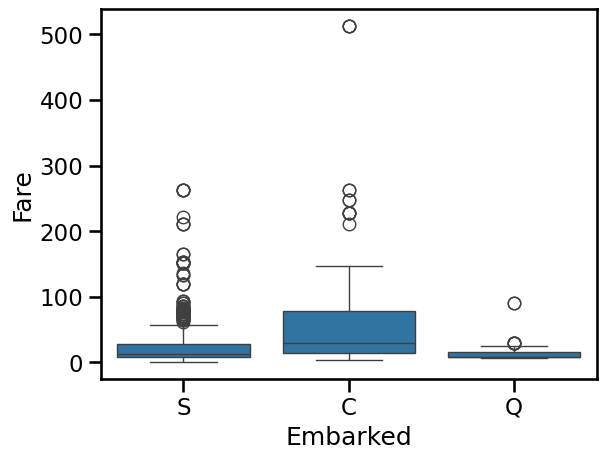

In [65]:
plt.rcdefaults()

sns.set_context("talk")

ax = sns.boxplot(x="Embarked", y="Fare", data=df)

plt.show()

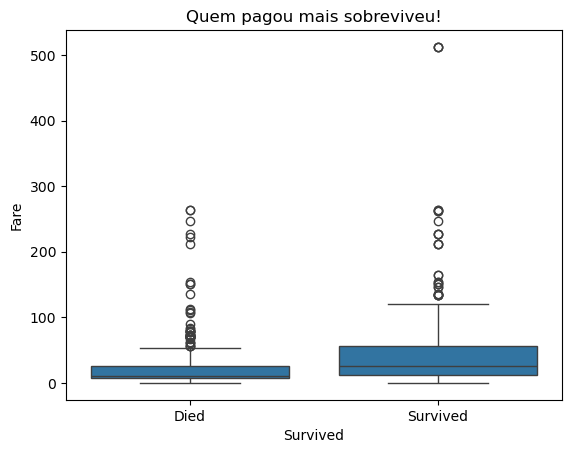

In [67]:
plt.rcdefaults()

ax = sns.boxplot(x="Survived", y="Fare", data=df)
ax.set_title("Quem pagou mais sobreviveu!")

plt.show()

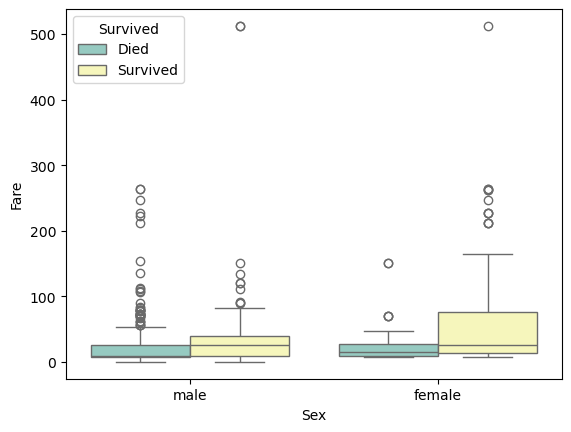

In [69]:
plt.rcdefaults()

ax = sns.boxplot(x="Sex", y="Fare", hue="Survived", data=df, palette="Set3")

plt.show()

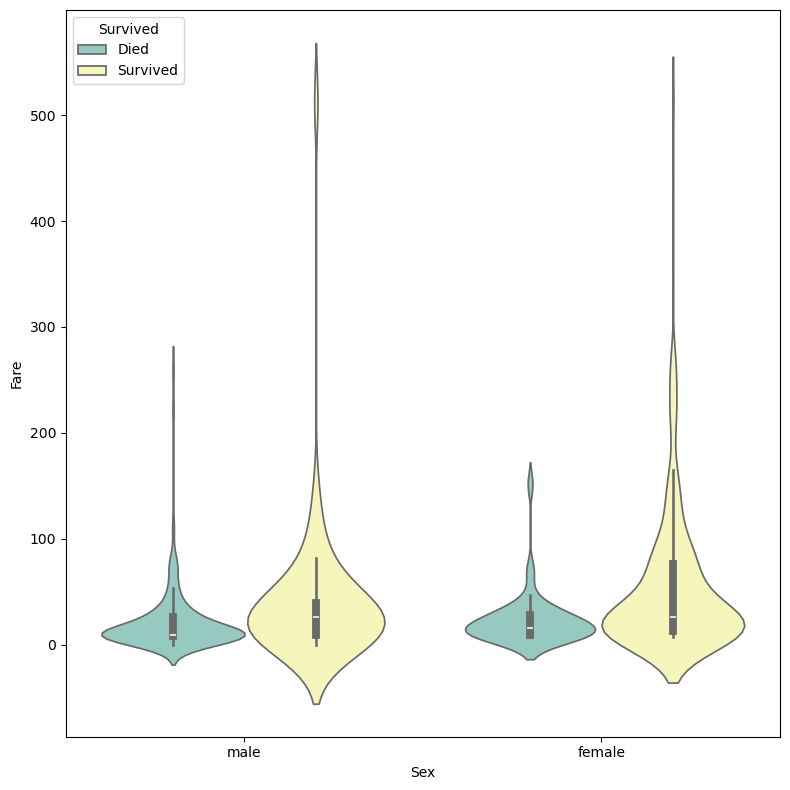

In [71]:
# violin plot
plt.rcdefaults()

plt.figure(figsize=(8,8))

sns.violinplot(x="Sex", y="Fare", hue="Survived", data=df, palette="Set3")

plt.tight_layout() 
plt.show()

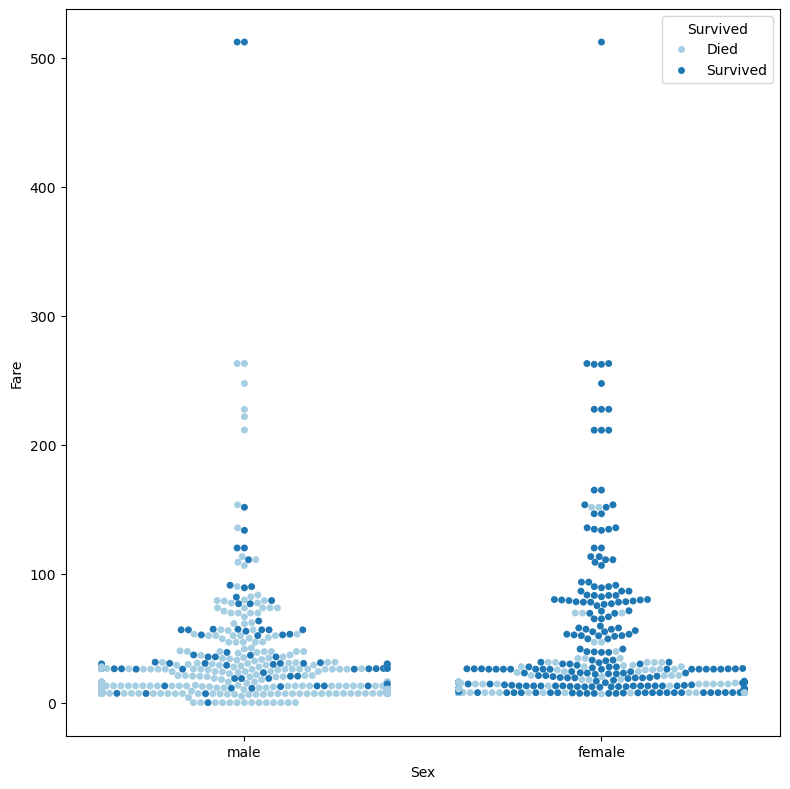

In [73]:
# swarm plot
plt.rcdefaults()

plt.figure(figsize=(8,8))

sns.set_palette("Paired")

sns.swarmplot(x="Sex", y="Fare", hue="Survived", data=df)

plt.tight_layout() 
plt.show()

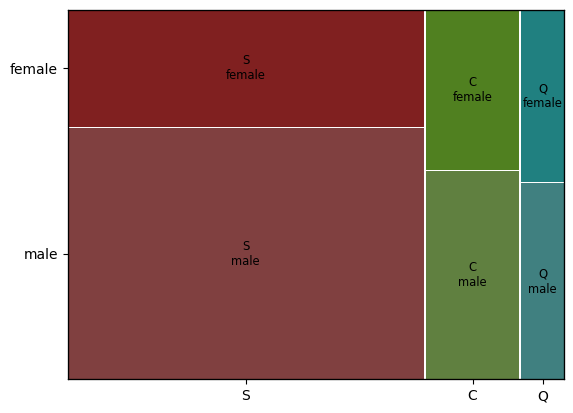

In [75]:
# Outros tipos de gráficos
# Mosaic plot
mosaic(df, ['Embarked', 'Sex'])
plt.show()

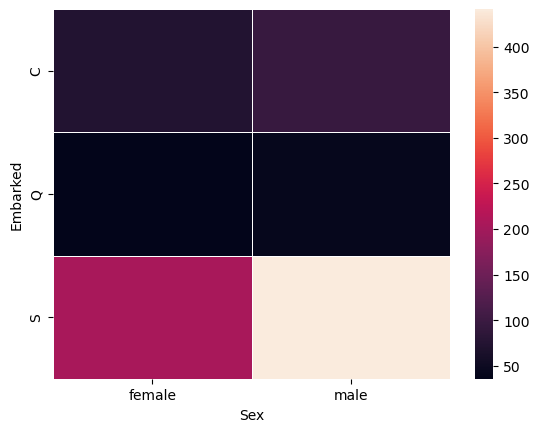

In [77]:
# Heatmap com Seaborn
#Fonte: https://seaborn.pydata.org/generated/seaborn.heatmap.html

plt.rcdefaults()

myCrosstable = pd.crosstab(df['Embarked'], df['Sex'])

ax = sns.heatmap(myCrosstable, linewidths=.5)
plt.show()

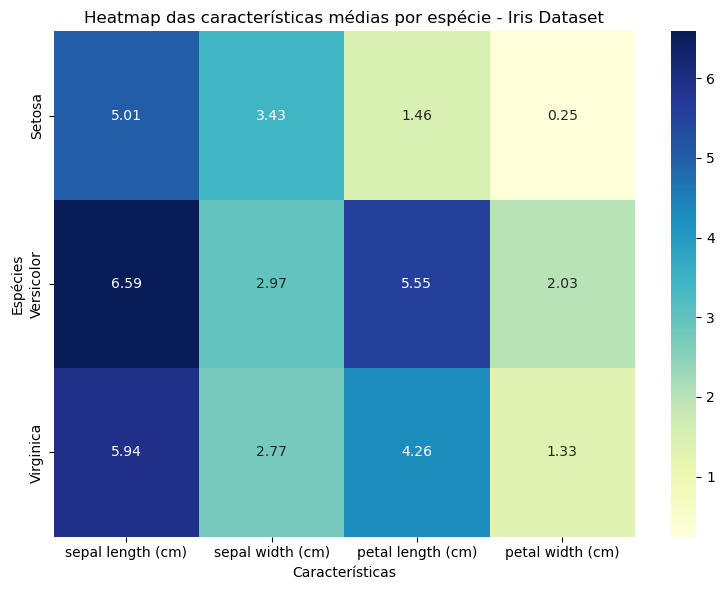

In [79]:
# Fazer a média das características por espécie (opcional para simplificação visual)
mean_values = iris.groupby('Species').mean()

# Criar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mean_values, annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")
plt.title("Heatmap das características médias por espécie - Iris Dataset")
plt.xlabel("Características")
plt.ylabel("Espécies")
plt.tight_layout()
plt.show()

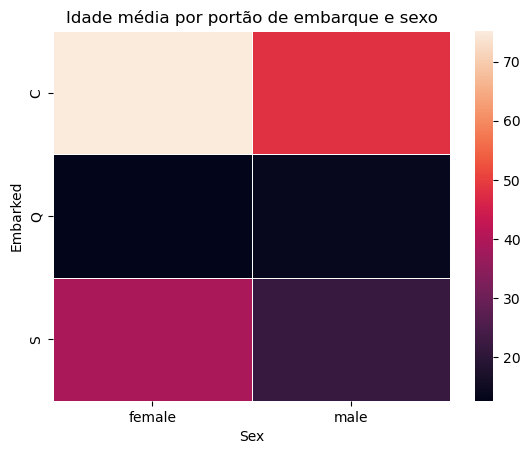

In [81]:
plt.rcdefaults()
mean_crosstab_sex_embarked = pd.pivot_table(df, values='Fare', index=['Embarked'],columns=['Sex'], aggfunc=np.mean)
ax = sns.heatmap(mean_crosstab_sex_embarked, linewidths=.5 )
# cmap can be "BuPu" "Blues" "YlGnBu" "Greens"
ax.set_title("Idade média por portão de embarque e sexo")
plt.show()

In [83]:
#  Chord

#Criando grafos com networkx:

import networkx as nx

# criando o grafo
G = nx.Graph() # para orientados usar G = nx.DiGraph(), G = nx.MultiGraph()

# adicionando nós
G.add_nodes_from(list(range(101)))
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

In [85]:
G.add_edge(1,2)
G.edges

EdgeView([(1, 2)])

In [87]:
import random
E = []
for i in range(30):
    x = random.randint(1,51)
    y = random.randint(1,51)
    E.append((x,y))

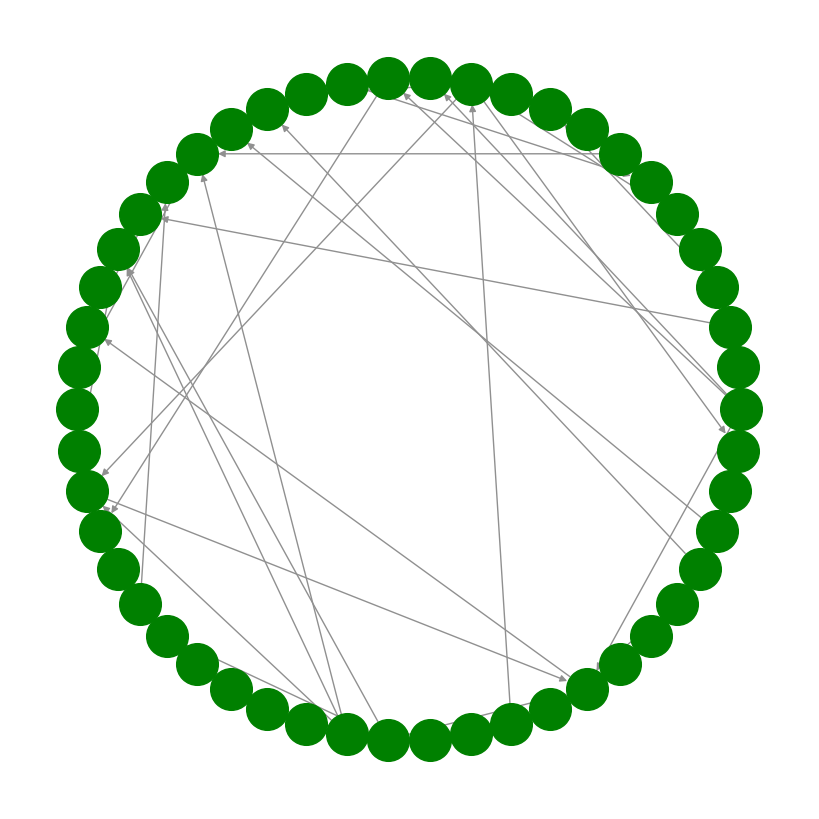

In [89]:
G=nx.DiGraph()
G.add_nodes_from(range(1,51))
G.add_edges_from(E)

plt.figure(figsize=(8,8))            
nx.draw_circular(G,node_color='g', edge_color='#909090', node_size=900)
plt.axis('equal')
plt.show()

In [99]:
# Colormap
#  Possíveis fontes:
#   https://www.kaggle.com/tonionca/terrorist-attacks-in-brazil-1970-2015
#   https://ocefpaf.github.io/python4oceanographers/blog/2013/08/12/brazil-states-map/
!pip install folium

In [101]:
import folium

In [103]:
sea_route = folium.Map(location=[51, -5.76], zoom_start=6)

# I have a little knowledge around there, and got choice them from some good references.
folium.Marker([50.892239,-1.3981697], popup='Southampton<br><i>10 April 1912</i>').add_to(sea_route)
folium.Marker([49.646042,-1.618031], popup='Cherbuorg<br><i>10 April 1912</i>').add_to(sea_route)
folium.Marker([51.853955,-8.2997997], popup='Queenstown<br><i>11 April 1912</i>').add_to(sea_route)

sea_route

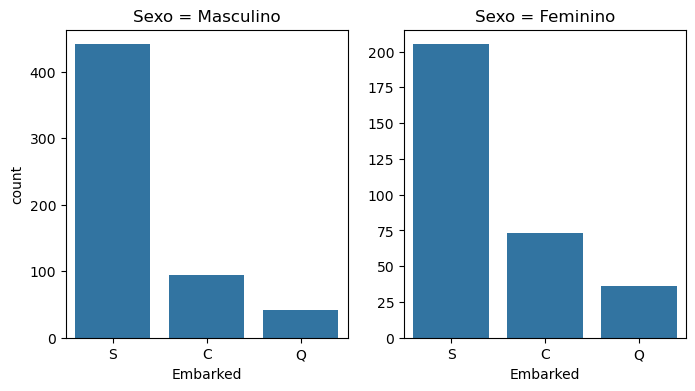

In [105]:
# Vários gráficos juntos numa mesma figura
#  Matplotlib e Seaborn
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='Embarked', data=df[df['Sex']=='male'][['Embarked']],order = df['Embarked'].value_counts().index)
ax1.set_title("Sexo = Masculino")
plt.subplot(1,2,2)
ax2 = sns.countplot(x="Embarked", data=df[df['Sex']=='female'][['Embarked']],order = df['Embarked'].value_counts().index)
ax2.set_title("Sexo = Feminino")
ax2.set_ylabel("")
plt.show()

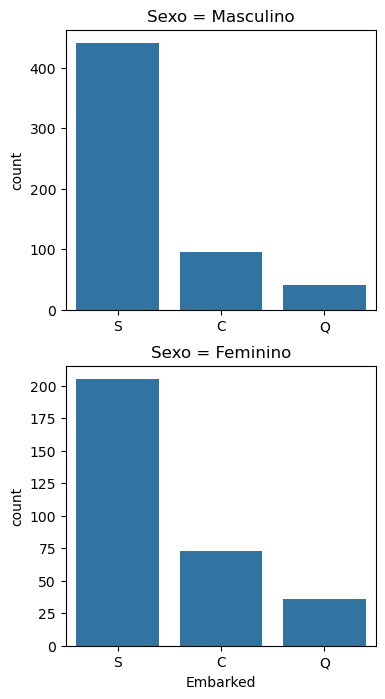

In [107]:
plt.figure(figsize=(4,8))
plt.subplot(2,1,1)
ax1 = sns.countplot(x='Embarked', data=df[df['Sex']=='male'][['Embarked']],order = df['Embarked'].value_counts().index)
ax1.set_title("Sexo = Masculino")
ax1.set_xlabel("")
plt.subplot(2,1,2)
ax2 = sns.countplot(x="Embarked", data=df[df['Sex']=='female'][['Embarked']],order = df['Embarked'].value_counts().index)
ax2.set_title("Sexo = Feminino")
plt.show()

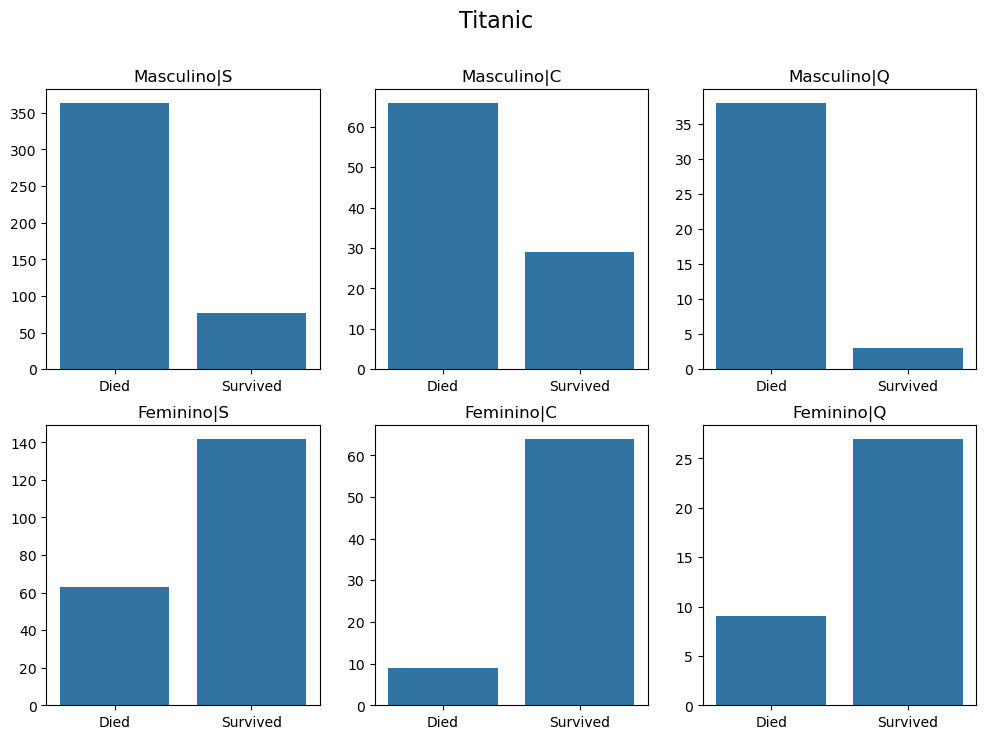

In [109]:
f = plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
ax1 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'male') & (df['Embarked'] == 'S' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax1.set_title("Masculino|S")
ax1.set_xlabel("")
ax1.set_ylabel("")
plt.suptitle('Titanic', fontsize=16)

plt.subplot(2,3,2)
ax2 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'male') & (df['Embarked'] == 'C' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax2.set_title("Masculino|C")
ax2.set_xlabel("")
ax2.set_ylabel("")

plt.subplot(2,3,3)
ax3 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'male') & (df['Embarked'] == 'Q' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax3.set_title("Masculino|Q")
ax3.set_xlabel("")
ax3.set_ylabel("")

plt.subplot(2,3,4)
ax4 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'female') & (df['Embarked'] == 'S' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax4.set_title("Feminino|S")
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.subplot(2,3,5)
ax5 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'female') & (df['Embarked'] == 'C' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax5.set_title("Feminino|C")
ax5.set_xlabel("")
ax5.set_ylabel("")

plt.subplot(2,3,6)
ax6 = sns.countplot(x='Survived',
                    data=df[(df['Sex'] == 'female') & (df['Embarked'] == 'Q' )][['Survived']],
                    order = df['Survived'].value_counts().index)
ax6.set_title("Feminino|Q")
ax6.set_xlabel("")
ax6.set_ylabel("")

plt.show()

In [115]:
!pip install ydata-profiling

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   ---------------------------------------- 666.4/666.4 kB 4.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=576193cc6438af8b94df37efb359cd2b2d9f21180e948157a98dd50be21c52c9
  Stored in directory: c:\users\rafae\appdata\local\pip\cache\wheels\5f\d4\d7\4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0


In [117]:
# Análise exploratória de dados automática
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [119]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 114.11it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]